In [1]:
import pandas as pd
import matplotlib as plt

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from matplotlib.pyplot import *
from sklearn.feature_selection import SelectKBest

In [2]:
class Analyzer():
    def get_daily_number(self, data, country):
        select_data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
        select_data = select_data.iloc[0,:]
        
        daily_number = pd.DataFrame(data=select_data)
        for i in range(0,len(select_data)):
            if i is not 0:
                daily_number.iloc[i] = select_data.iloc[i] - select_data.iloc[i-1]
            else:
                daily_number.iloc[0] = select_data.iloc[0]
        
        print(type(daily_number))
        return daily_number
    
    def sum_data(self, data, country):
        select_data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
        
        sum_of_data = pd.DataFrame([select_data.sum()])
        sum_of_data.insert(0, 'Province/State', 'ALL')
        sum_of_data.insert(1, 'Country/Region', country)
        sum_of_data.insert(2, 'Lat', 'NaN')
        sum_of_data.insert(3, 'Long', 'NaN')
        
        return sum_of_data
    
    def count_spreading_rate(self, data):
        select_data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
        select_data = select_data.iloc[0,:]

        virus_exist = False
        difference = [0]
        spreading_rate = []
        average_spreading_rate = 0
        ndays = 0
        for i in range(1, len(select_data)):
            difference.append(select_data.iloc[i]-select_data.iloc[i-1])

            if virus_exist == True:
                spreading_rate.append((difference[i]/select_data.iloc[i-1])*100)

            if select_data.iloc[i] > 0:
                ndays += 1
                virus_exist = True

        if len(spreading_rate) > 0:
            average_spreading_rate = sum(spreading_rate)/len(spreading_rate)
        
        return average_spreading_rate, ndays
    
    def predict_autoregression():
        pass
        return


class Visualizer():
    def plot_line(self, data, country, legend, case, begin, end):
        begin_index = data.columns.get_loc(begin)
        end_index = data.columns.get_loc(end)
        visual_data = data.iloc[:, begin_index:end_index]
        
        fig, plt = subplots(figsize=(20, 5))
        visual_data.T.plot(kind='line', ax=plt, linewidth=3)
        plt.legend(legend, loc=2, fontsize=10);
        plt.set_xlabel('Dates', fontdict={'fontsize':15})
        plt.set_ylabel('Number', fontdict={'fontsize':15})
        plt.set_title('%s cases in %s' %(case, country), fontdict={'fontsize':25})

## Read Data
- get confirmed, deaths and recovered data
- set selected country
- set observed date

In [5]:
# # # READ TIMESERIES DATA # # #
# Dataset from https://github.com/CSSEGISandData/COVID-19

select_country = 'Indonesia'
begin_date = '3/1/20' #M/D/YY started from 1/22/20
end_date = '6/20/20' #M/D/YY until today
df_confirmed = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Visualization
- Agreggate numbers of confirmed, death and recovered cases in a country
- Add the aggregate as another row
- Find daily new cases
- Visualize

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
In 111 days, average spreading_rate is 11.174866%


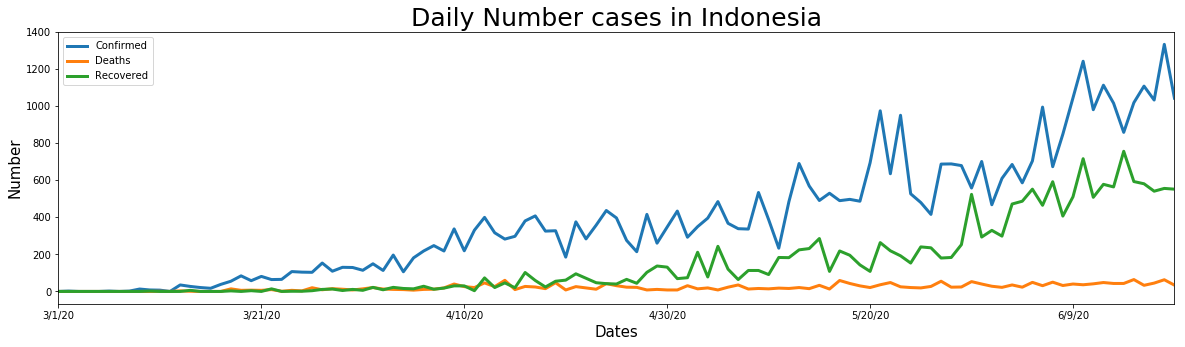

In [6]:
# sum confirmed cases
confirmed_data = df_confirmed.loc[df_confirmed['Country/Region'] == select_country] 
sum_of_confirmed = Analyzer().sum_data(confirmed_data, select_country)
confirmed_data = confirmed_data.append(sum_of_confirmed, ignore_index = True, sort=False)
spreading_rate, ndays = Analyzer().count_spreading_rate(confirmed_data)

# sum death cases
deaths_data = df_deaths.loc[df_deaths['Country/Region'] == select_country] 
sum_of_deaths = Analyzer().sum_data(deaths_data, select_country)
deaths_data = deaths_data.append(sum_of_deaths, ignore_index = True, sort=False)

# sum recovered cases
recovered_data = df_recovered.loc[df_recovered['Country/Region'] == select_country] 
sum_of_recovered = Analyzer().sum_data(recovered_data, select_country)
recovered_data = recovered_data.append(sum_of_recovered, ignore_index = True, sort=False)

# daily new cases
daily_confirmed = Analyzer().get_daily_number(confirmed_data, select_country)
daily_deaths = Analyzer().get_daily_number(deaths_data, select_country)
daily_recovered = Analyzer().get_daily_number(recovered_data, select_country)
daily_cases = daily_confirmed.T
daily_cases = daily_cases.append(daily_deaths.T)
daily_cases = daily_cases.append(daily_recovered.T)

print('In %d days, average spreading_rate is %f%%' %(ndays, spreading_rate))
# Visualizer().plot_line(confirmed_data, select_country, confirmed_data['Province/State'], 'Confirmed', begin_date, end_date)
# Visualizer().plot_line(deaths_data, select_country, deaths_data['Province/State'], 'Deaths', begin_date, end_date)
# Visualizer().plot_line(recovered_data, select_country, recovered_data['Province/State'], 'Recovered', begin_date, end_date)
Visualizer().plot_line(daily_cases, select_country, ['Confirmed', 'Deaths','Recovered'], 'Daily Number', begin_date, end_date)

## Prediction

In [22]:
data = df_confirmed.loc[:, begin_date:end_date].T
target = df_confirmed.loc[df_confirmed['Country/Region'] == select_country, begin_date:end_date].T

best_features = SelectKBest(k=5)
fit = best_features.fit(data, target)
df_score = pd.DataFrame(data=fit.scores_, columns = ['features'], index = data.columns)
# df_score.plot(kind='barh', figsize=(10,10))

df_score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  0   3   4   5   8  13  18  20  21  24  25  26  29  30  31  32  33  34
  37  38  39  40  41  43  45  46  47  49  51  52  55  56  57  58  60  63
  64  65  66  67  69  71  72  73  75  77  78  79  80  82  83  84  86  90
  93  95  96  99 100 101 103 104 105 108 109 110 111 112 114 117 118 121
 123 124 126 127 128 132 141 142 145 146 148 150 152 154 156 157 159 161
 162 164 165 166 167 168 171 172 173 174 179 180 188 189 190 195 199 202
 203 204 208 210 211 213 214 217 218 219 221 222 224 226 227 229 230 231
 232 233 234 235 236 237 238 239 240 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 

,features
0,inf
1,7.723578e+03
2,1.982686e+05
3,inf
4,inf
5,inf
6,8.994725e+05
7,8.850888e+05
8,inf
9,4.750867e+04


In [23]:
data = sum_of_confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
row, col = data.shape

training_set = []
prediction_result = []
virus_exist = False
ndays = 0
for i in range(1, col):
    if len(training_set) > 12:
        model = AR(training_set)
        model_fit = model.fit()
        prediction = model_fit.predict(len(training_set), len(training_set))
#         test = model_fit.t_test(data)
        prediction_result.append(prediction[0])
    
    if data.iloc[0,i] > 0:
        ndays += 1
        virus_exist = True
        training_set.append(data.iloc[0,i])
        
# # training_set.append()
# model = AR(training_set)
# model_fit = model.fit()
# prediction = model_fit.predict(len(training_set), len(training_set))
# prediction_result.append(prediction[0])
        
# data = [x + random() for x in range(1, 9)]
# model = AR(data)
# model_fit = model.fit()

# yhat = model_fit.predict(len(data), len(data))
# yhat
print(len(training_set))
print(training_set)
print(prediction_result)

68
[2, 2, 2, 2, 4, 4, 6, 19, 27, 34, 34, 69, 96, 117, 134, 172, 227, 311, 369, 450, 514, 579, 686, 790, 893, 1046, 1155, 1285, 1414, 1528, 1677, 1790, 1986, 2092, 2273, 2491, 2738, 2956, 3293, 3512, 3842, 4241, 4557, 4839, 5136, 5516, 5923, 6248, 6575, 6760, 7135, 7418, 7775, 8211, 8607, 8882, 9096, 9511, 9771, 10118, 10551, 10843, 11192, 11587, 12071, 12438, 12776, 13112]
[178.13480394772665, 194.64448543412743, 219.70296799406282, 204.51593892865628, 191.26084679875044, 393.87090497448736, 363.57888220763516, 558.7849421343528, 706.1389818859551, 598.21921554405, 795.7342807404535, 861.5631204695253, 966.0826628959787, 1076.564458207935, 1290.2964692439377, 1427.3498597418445, 1504.345486521681, 1686.5416716977131, 1829.0153803085288, 1870.5621980811882, 2135.7216852801835, 2220.175891574828, 2383.6548983015628, 2618.4253422350243, 3042.449145494088, 3205.664254760722, 3574.74288191277, 3901.7715590066236, 4147.226388419095, 4617.494768243009, 4976.296229876478, 5332.016185861222, 54

## Global comlparison
- Calculate spreading rate

In [24]:
data = confirmed_data
select_data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
select_data = select_data.iloc[0,:]

virus_exist = False
difference = [0]
spreading_rate = []
average_spreading_rate = 0
ndays = 0
for i in range(1, len(select_data)):
    difference.append(select_data.iloc[i]-select_data.iloc[i-1])

    if virus_exist == True:
        spreading_rate.append((difference[i]/select_data.iloc[i-1])*100)
        ndays += 1

    if select_data.iloc[i] > 0:
        ndays += 1
        virus_exist = True

if len(spreading_rate) > 0:
    average_spreading_rate = sum(spreading_rate)/len(spreading_rate)

print('ndays: %d, len: %d' %(ndays, len(spreading_rate)))

ndays: 135, len: 67


- Print comparison

In [25]:
countries = np.unique(df_confirmed['Country/Region'])

df_countries_cases = pd.DataFrame(index=['Confirmed', 'Deaths', 'Recovered', 'Death rate', 'Spreading rate', 'Days of infected'])
for country in countries:
    confirmed_data = df_confirmed.loc[df_confirmed['Country/Region'] == country]
    sum_of_confirmed = Analyzer().sum_data(confirmed_data, country)
    
    deaths_data = df_deaths.loc[df_deaths['Country/Region'] == country]
    sum_of_deaths = Analyzer().sum_data(deaths_data, country)
    
    recovered_data = df_recovered.loc[df_recovered['Country/Region'] == country]
    sum_of_recovered = Analyzer().sum_data(recovered_data, country)
    
    death_rate = sum_of_deaths.iloc[0,col-1]/sum_of_confirmed.iloc[0,col-1]*100
    
    spreading_rate, ndays = Analyzer().count_spreading_rate(confirmed_data)
    
    df_countries_cases[country] = [sum_of_confirmed.iloc[0,col-1], sum_of_deaths.iloc[0,col-1], \
                                   sum_of_recovered.iloc[0,col-1], death_rate, spreading_rate, ndays]
    
# Visualizer().plot_line(df_confirmed_countries, 'WORLD', df_confirmed_countries['Country/Region'], 'Confirmed', begin_date, end_date)

print('Period %s - %s' %(begin_date, end_date))
print(df_countries_cases.T.to_string())


Period 3/1/20 - 5/8/20
                                  Confirmed   Deaths  Recovered  Death rate  Spreading rate  Days of infected
Afghanistan                          2894.0     90.0      397.0    3.109883       14.667079              75.0
Albania                               803.0     31.0      543.0    3.860523       14.946332              61.0
Algeria                              4648.0    465.0     1998.0   10.004303       14.782217              74.0
Andorra                               750.0     45.0      499.0    6.000000       33.944948              68.0
Angola                                 35.0      2.0       11.0    5.714286        9.149540              50.0
Antigua and Barbuda                    25.0      3.0       15.0   12.000000        8.639334              57.0
Argentina                            4887.0    260.0     1442.0    5.320237       17.307535              67.0
Armenia                              2507.0     39.0     1071.0    1.555644       16.303267      